Importing the modules

In [23]:
from math import *
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 2
import seaborn as sns

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [24]:
bookings = pd.read_csv(r"C:\Users\Zenia\Downloads\hotel_bookings/hotel_bookings.csv")
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


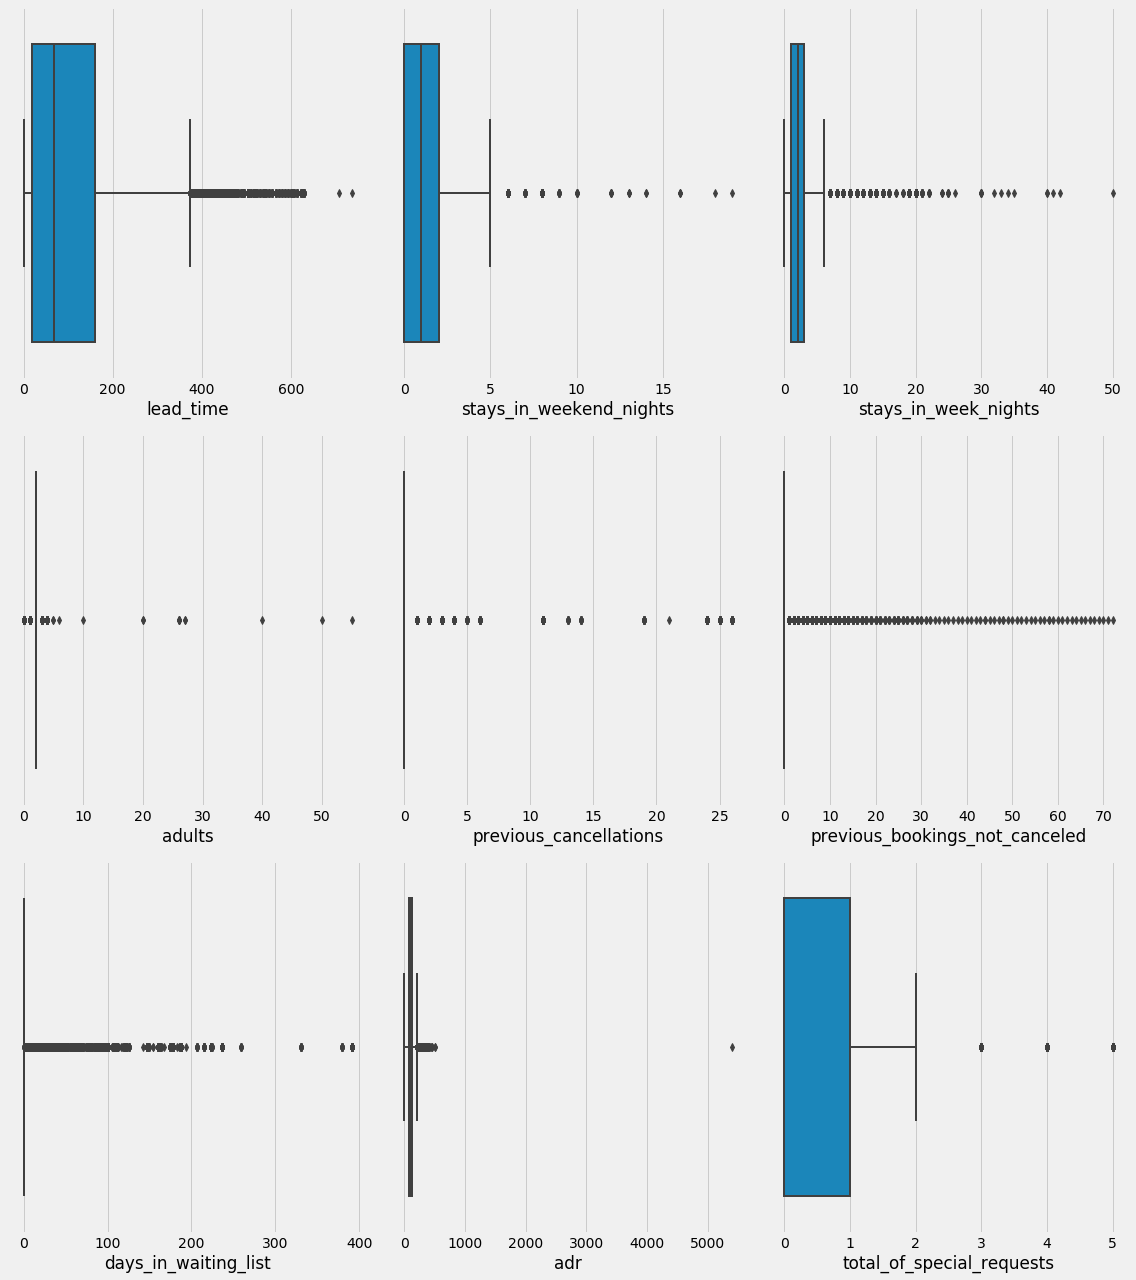

In [25]:
# Creating a boxplot for Outlier detection
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations',
            'previous_bookings_not_canceled','days_in_waiting_list', 'adr', 'total_of_special_requests']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(3,3,n)
    sns.boxplot(bookings[feature])
    n+=1
    plt.tight_layout()

In [26]:
# Check for the missing data
bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [27]:
# Some data are missing large in number, and can be conveniently dropped along with unnecessary features
bookings.drop(['agent', 'company', 'arrival_date_week_number'], axis=1, inplace=True)

In [31]:
#this is for all columns
#bookings = bookings.fillna(bookings.mode().iloc[0])

#this is for single column
bookings = bookings.fillna(bookings['country'].value_counts().index[0]) 

In [32]:
bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [34]:
# Arrival date to datetime
bookings['arrival_date_year'] = bookings['arrival_date_year'].astype('str')
bookings['arrival_date_month'] = bookings['arrival_date_month'].astype('str')
bookings['arrival_date_day_of_month'] = bookings['arrival_date_day_of_month'].astype('str')

bookings['arrival_date'] = bookings['arrival_date_day_of_month'] + '-' + bookings['arrival_date_month'] + '-' + bookings['arrival_date_year']

bookings['arrival_date'] = pd.to_datetime(bookings['arrival_date'], errors='coerce')

In [35]:
# applying string methode to convert to categorical feature
bookings['is_canceled'] = bookings['is_canceled'].astype('str')
bookings['is_repeated_guest'] = bookings['is_repeated_guest'].astype('str')

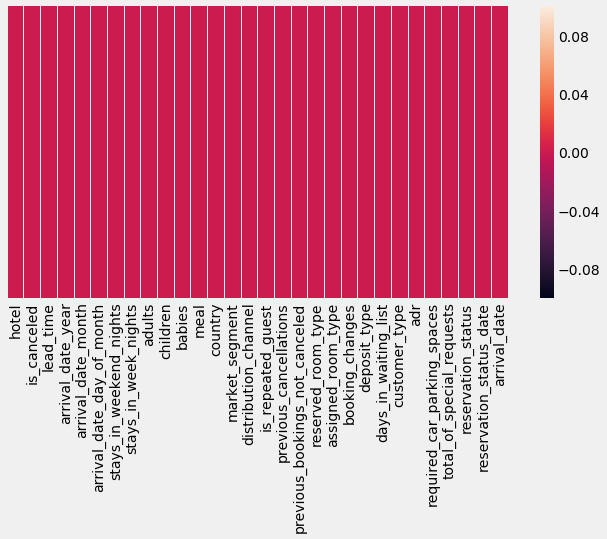

In [37]:
# Missing value visualization 
plt.figure(figsize=(10,5))
sns.heatmap(bookings.isnull(), yticklabels=False)
plt.show()

In [38]:
confirmed_bookings = bookings[bookings.is_canceled=='0']


import datetime as dt
confirmed_bookings['arrival_month'] = bookings['arrival_date'].dt.month
confirmed_bookings.arrival_month.value_counts().sort_index()

1     4122
2     5372
3     6645
4     6565
5     7114
6     6404
7     7919
8     8638
9     6392
10    6914
11    4672
12    4409
Name: arrival_month, dtype: int64

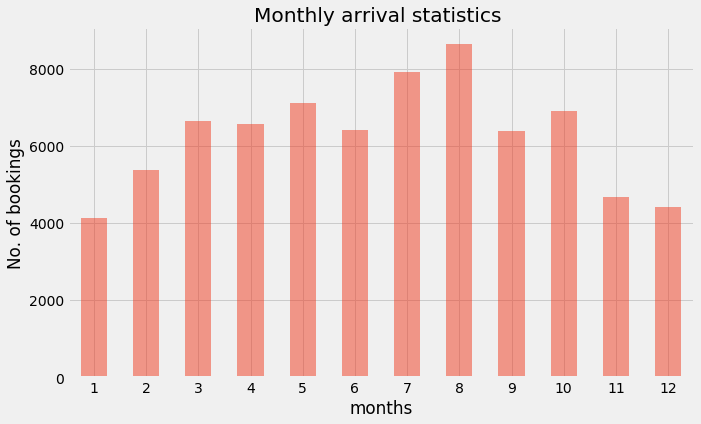

In [41]:
# Visualization of arrival on monthly basis for both types of hotels together
plt.figure(figsize=(12,5))
(confirmed_bookings.arrival_month.value_counts().sort_index()).plot(kind='bar',
                    figsize=(10,6), title = 'Monthly arrival statistics ', color='#f03b20', alpha=0.5)
plt.xlabel('months')
plt.ylabel('No. of bookings')
plt.xticks(rotation='horizontal')
plt.show()

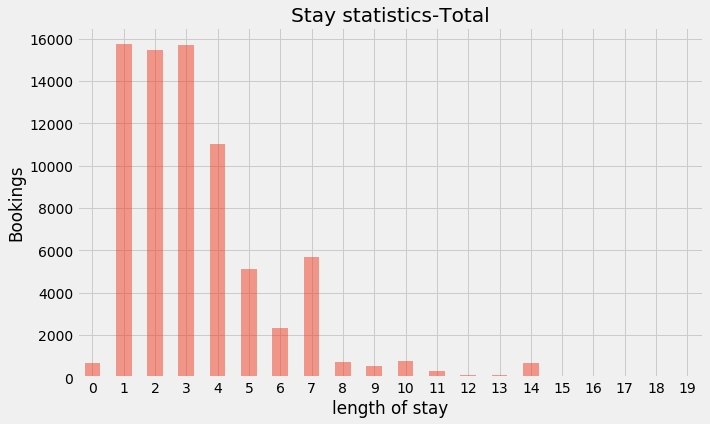

In [42]:
confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights
length_of_stay = confirmed_bookings.total_span_of_stay.value_counts().sort_index()
length_of_stay.head(20).plot(kind='bar', figsize=(10,6), title = 'length of stay', color='#f03b20', alpha=0.5)
plt.title('Stay statistics-Total')
plt.xlabel('length of stay')
plt.ylabel('Bookings')
plt.xticks(rotation='horizontal')
plt.show()

In [43]:
# Making  seperate dataframes for City hotels and Resort hotels
conf_book_city = confirmed_bookings[confirmed_bookings.hotel=='City Hotel']
conf_book_resort = confirmed_bookings[confirmed_bookings.hotel=='Resort Hotel']

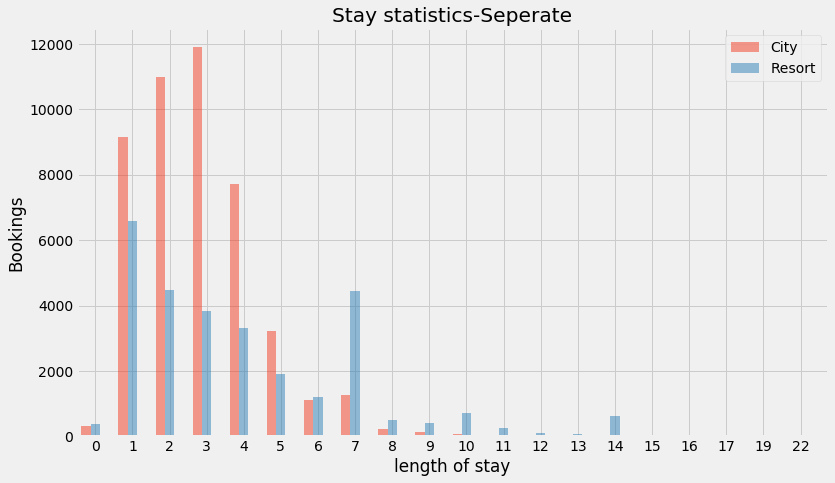

In [44]:
# Stay statistics based on type of hotel
city = conf_book_city.total_span_of_stay.value_counts().head(20).sort_index()
resort = conf_book_resort.total_span_of_stay.value_counts().head(20).sort_index()

position = list(range(len(city)))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
plt.bar([p for p in position], city, width, alpha=0.5, color='#f03b20', label='City')
plt.bar([p+width for p in position], resort, width, alpha=0.5, color='#2c7fb8', label='Resort')

ax.set_xticks([p + width for p in position])
ax.set_xticklabels(city.index)
plt.xlim(min(position)-width, max(position)+width*4)
plt.title('Stay statistics-Seperate')
plt.xlabel('length of stay')
plt.ylabel('Bookings')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

Weekday statistics of check-in's

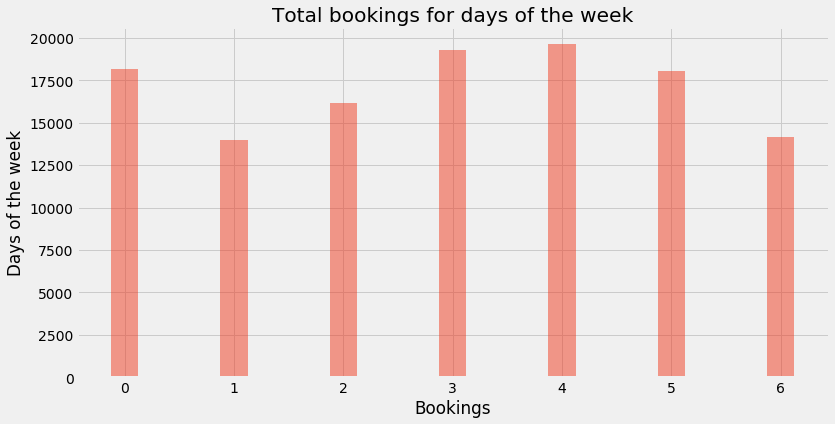

In [45]:
weekday = bookings.arrival_date.dt.weekday.value_counts().sort_index()

position = list(range(len(weekday))) 
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(position, weekday, width, alpha=0.5, color='#f03b20', label='Cancelled Bookings')

ax.set_xticks([p for p in position])
ax.set_xticklabels(city.index)
ax.set_title('Total bookings for days of the week')
ax.set_xlabel('Bookings')
ax.set_ylabel('Days of the week')
plt.show()

Booking pattern over the years

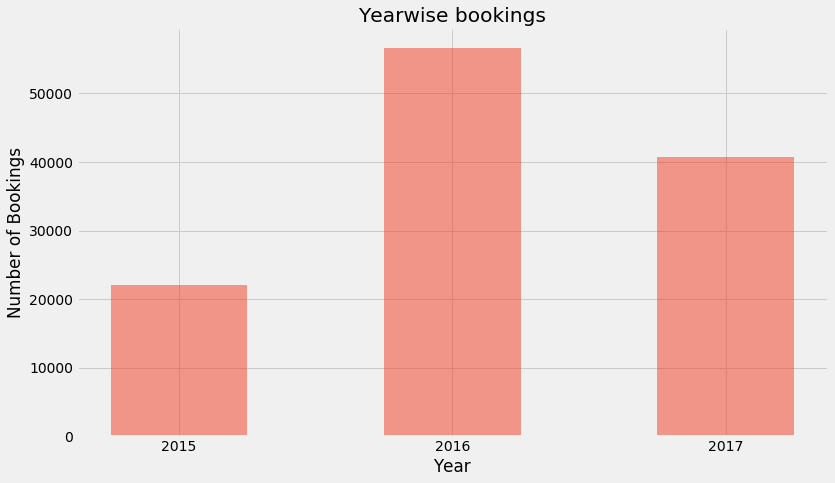

In [47]:
year = bookings.arrival_date.dt.year.value_counts().sort_index()
position = list(range(len(year))) 

fig, ax = plt.subplots(figsize=(12,7))
plt.bar(position, year, width=.50, alpha=0.5, color='#f03b20', label=year.index[0])

ax.set_xticks([p for p in position])
ax.set_xticklabels(year.index)
plt.title('Yearwise bookings')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.show()

Evaluating price per night per person

In [48]:
# Creating dataframe for price distribution
confirmed_bookings['total_legit_members'] = confirmed_bookings.adults + confirmed_bookings.children
confirmed_bookings_copy = confirmed_bookings.drop(index=confirmed_bookings.loc[confirmed_bookings.total_legit_members==0].index, axis=0)
confirmed_bookings_copy['price_night_person'] = confirmed_bookings_copy.adr/confirmed_bookings_copy.total_legit_members
prices = confirmed_bookings_copy[['hotel', 'reserved_room_type', 'price_night_person']].sort_values('reserved_room_type')
prices.head()

,hotel,reserved_room_type,price_night_person
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40


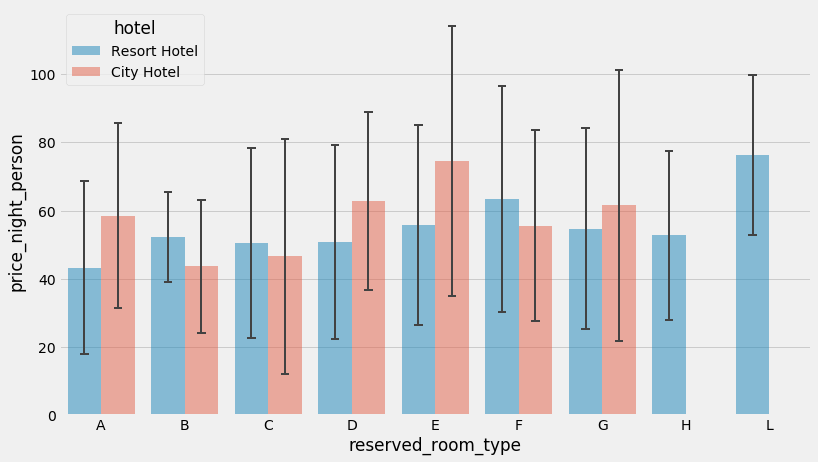

In [49]:
# Visualizing the price distribution
plt.figure(figsize=(12,7))
sns.barplot(x=confirmed_bookings_copy.reserved_room_type.sort_values(), y='price_night_person', hue='hotel', 
            data=confirmed_bookings_copy, alpha=0.5, ci='sd', errwidth=2, capsize=0.1)
plt.show()

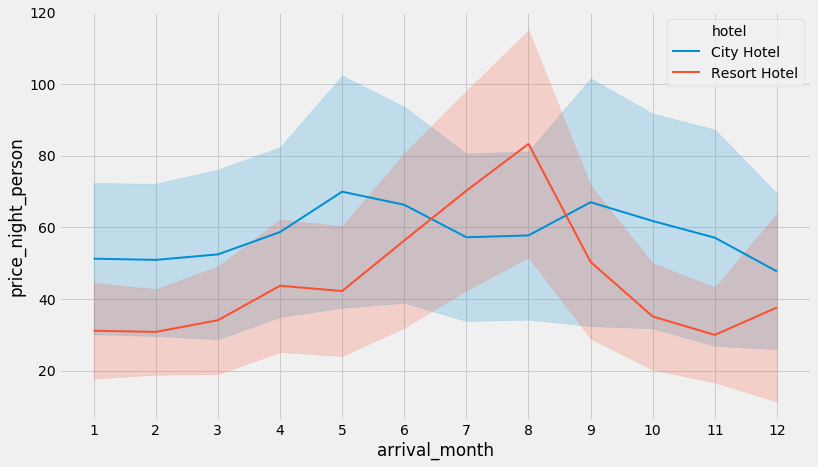

In [50]:
# Room price variation
price_variation = confirmed_bookings_copy[['hotel','arrival_month', 'price_night_person']].sort_values('arrival_month')
position = price_variation.arrival_month.value_counts().sort_index().index
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.lineplot(x='arrival_month', y='price_night_person', hue='hotel', data=price_variation, ci='sd')
ax.set_xticks([p for p in position])
ax.set_xticklabels(position)
plt.show()